## Demo JNotebook for git

In [28]:
from data_view import *
from sklearn import datasets 

from jupyterthemes import jtplot
jtplot.style(context='notebook', ticks=True, grid=False)

In [3]:
# create directory for data
!mkdir data

mkdir: data: File exists


In [20]:
iris = datasets.load_iris()

In [21]:
X = iris.data  # we only take the first two features.
y = pd.Series(iris.target).map(lambda x: iris.target_names[int(x)])

In [22]:
iris = pd.DataFrame(X, columns=iris.feature_names)
iris['group'] = y

Размер данных: (150, 5)

Обзор первых/последних строк данных
----------------------------------------------------------------------------------------------------



Типы данных и кол-во непустых строк
----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
group                150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB



Наличие дат (месяц, год, день) или id в названиях столбцов
----------------------------------------------------------------------------------------------------



Кол-во пропусков в данных
----------------------------------------------------------------------------------------------------



Кол-во дубликатов в данных
----------------------------------------------------------------------------------------------------
1

Описательные статистики числовых признаков
----------------------------------------------------------------------------------------------------



Гистограммы числовых показателей
----------------------------------------------------------------------------------------------------


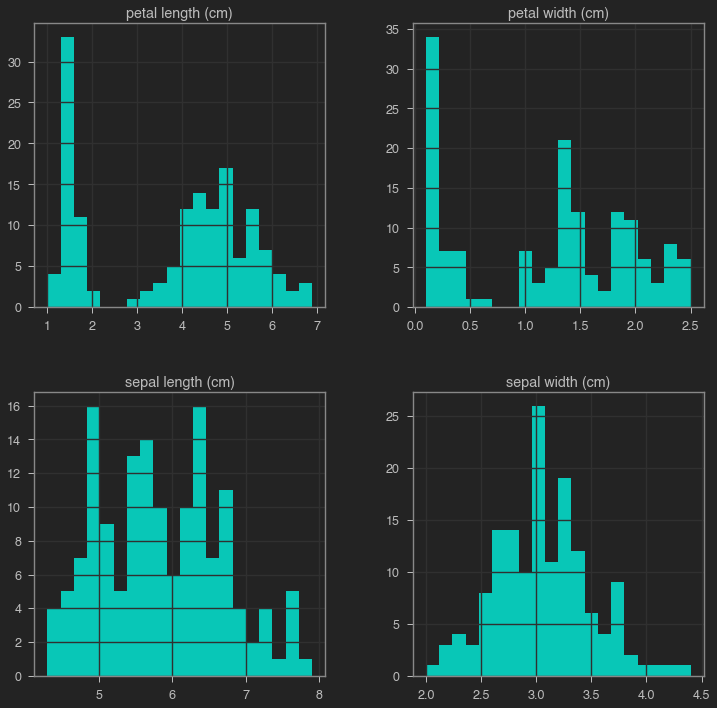


Описательные статистики категориальных признаков
----------------------------------------------------------------------------------------------------




Топ-5 уникального категориального признака
----------------------------------------------------------------------------------------------------




Статистики при группировке по некоторым категориям
----------------------------------------------------------------------------------------------------
Группировка по: group


petal length (cm)  petal width (cm)  sepal length (cm)  \
group                                                                
setosa                     50                50                 50   
versicolor                 50                50                 50   
virginica                  50                50                 50   

            sepal width (cm)  
group                         
setosa                    50  
versicolor                50  
virginica                 50



Матрица корреляций
----------------------------------------------------------------------------------------------------




Список корреляций больших 0.7


In [29]:
view(iris, only_numeric=False)

## Paired scatterplots

In [34]:
import seaborn as sns
from itertools import combinations

Пара признаков: sepal length (cm)-sepal width (cm)


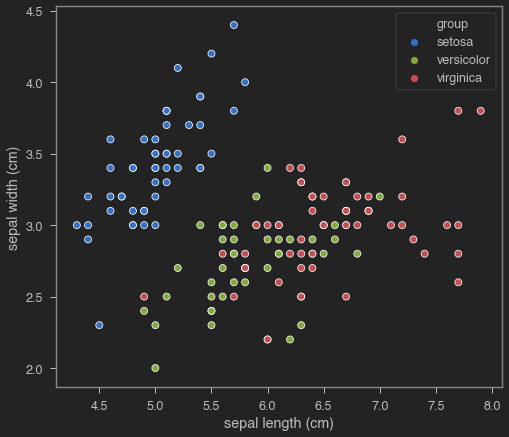

Пара признаков: sepal length (cm)-petal length (cm)


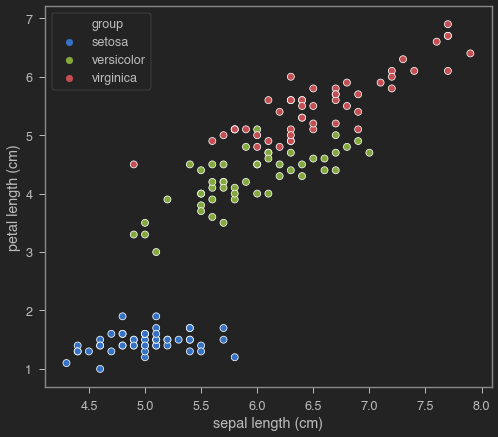

Пара признаков: sepal length (cm)-petal width (cm)


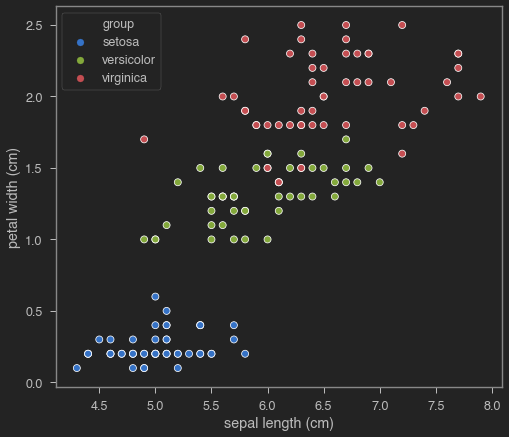

Пара признаков: sepal width (cm)-petal length (cm)


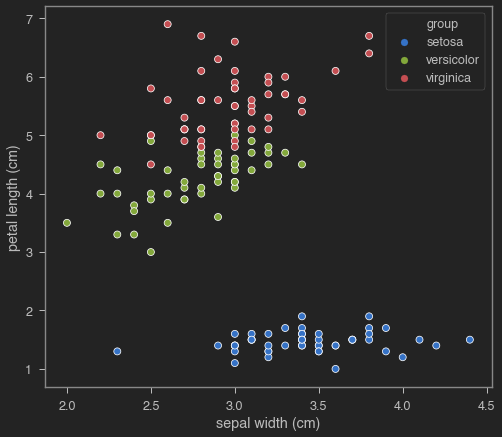

Пара признаков: sepal width (cm)-petal width (cm)


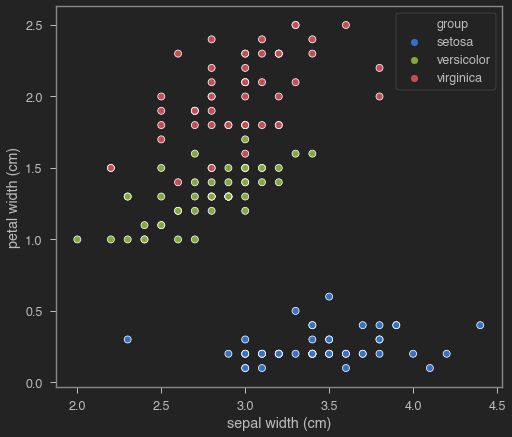

Пара признаков: petal length (cm)-petal width (cm)


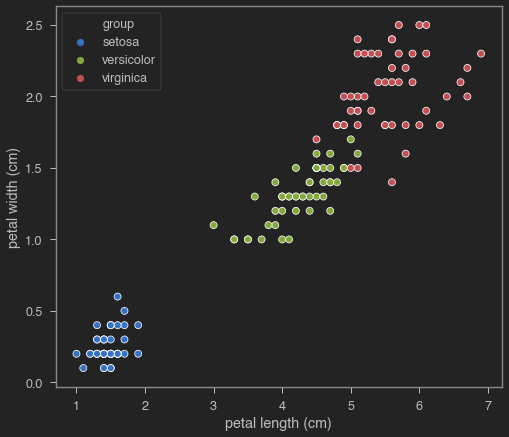

In [39]:
for pair in combinations(iris.drop('group', axis=1).columns, 2):
    print(f'\033[1mПара признаков:\033[0m {"-".join(pair)}')
    sns.scatterplot(x=pair[0], y=pair[1], hue='group', data=iris)
    plt.show()

## Save into json

In [44]:
iris.to_json('iris.json')

-------

## ML Scenario

### Evristic

 - if `petal length` < 2.5 and `petal width` < 0.75 -> setosa
 - if `petal length` > 2.5 and `petal width` > 1.55 -> virginica
 - if `petal length` > 2.5 and `petal width` < 1.55 -> versicolor

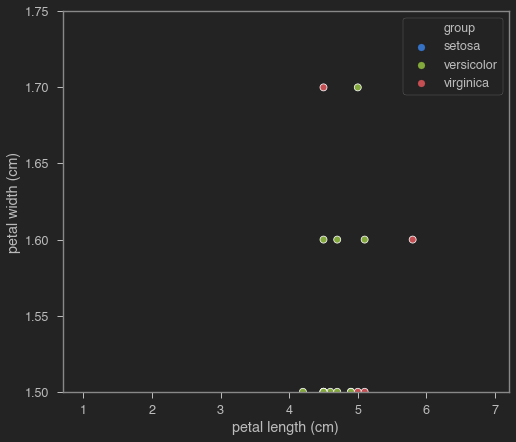

In [45]:
sns.scatterplot(x=pair[0], y=pair[1], hue='group', data=iris)
plt.ylim((1.5, 1.75))
plt.show()

In [54]:
# encoding group
group_dict = {
    'setosa':1,
    'virginica':2,
    'versicolor':3
}

In [55]:
iris['target'] = iris['group'].map(group_dict)

In [49]:
# Super-puper ML function
def make_ml(row):
    if row['petal length (cm)'] < 2.5 and row['petal width (cm)'] < 0.75:
        return 1
    if row['petal length (cm)'] > 2.5 and row['petal width (cm)'] > 1.55:
        return 2
    if row['petal length (cm)'] > 2.5 and row['petal width (cm)'] < 1.55:
        return 3

In [52]:
# Make ML
iris['pred'] = iris.apply(make_ml, axis=1)

In [61]:
# Score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [62]:
accuracy_score(iris['target'], iris['pred'])

0.9466666666666667

In [64]:
precision_score(iris['target'], iris['pred'], average='macro')

0.9471153846153846

In [66]:
recall_score(iris['target'], iris['pred'], average='macro')

0.9466666666666667

In [67]:
f1_score(iris['target'], iris['pred'], average='macro')

0.9466453247965854

## Save results into json

In [68]:
iris.to_json('iris.json')